<a href="https://colab.research.google.com/github/crsarav/fraud-detection-using-ml/blob/master/fraud_detection_using_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import pandas_datareader.data as pdr
import datetime
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/creditcard.csv',low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()
df = df.fillna(method='ffill')

In [0]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

449
245152


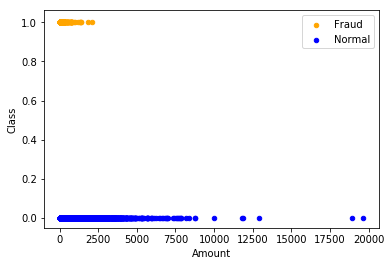

In [0]:
ax = fraud.plot.scatter(x = 'Amount', y = 'Class', color = 'Orange', label = 'Fraud')

non_frauds.plot.scatter(x = 'Amount', y = 'Class', color = 'Blue', label = 'Normal',ax=ax)

pyplot.show()

In [0]:
X_train = df.iloc[:,:-1]
Y_train = df['Class']

In [0]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds = 20
seed = 7
scoring = 'neg_mean_squared_error'

In [0]:
# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVR', SVR()))
models.append(('Logistic',LogisticRegression()))

In [0]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.000858 (0.000192)
LASSO: -0.001825 (0.000286)
EN: -0.001825 (0.000286)
KNN: -0.001681 (0.000289)
Logistic: -0.001026 (0.000258)


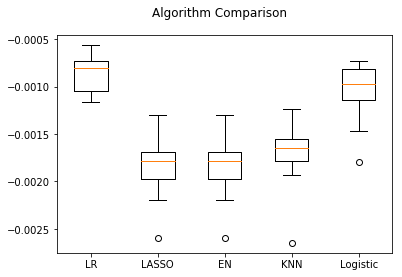

In [42]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()